In [15]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
%config InlineBackend.figure_format = 'png'
params = {'image.cmap': "Set2"}
matplotlib.rcParams.update(params)
import numpy as np
import floatpy.readers.padeops_reader as por
from scipy import stats
import scripts.get_namelist as nml
from scripts.common import *

def get_q(reader,qname):
    u = reader.readData(qname);
    u = np.squeeze(u);
    ubar = np.mean(np.mean(u,axis=2),axis=0);
    uprime = np.squeeze(u-ubar[None,:,None])
    return u,ubar,uprime

def get_qf(reader,qname):#Favre average
    r,u = reader.readData(('rho',qname));
    u = np.squeeze(u);
    r = np.squeeze(r);  
    rbar   = np.mean(np.mean(r,axis=2),axis=0)
    utilde = np.mean(np.mean(r*u))/rbar;
    upprime2D = np.squeeze(u-utilde)
    return u,utilde,upprime2D


In [32]:
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc16/rr1/1024x1448x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/512x724x256/'

filename_prefix = directory+'shearlayer_'
inp = nml.inputs(directory,verbose=True)
Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=True)
Ny = int(Ny)
y = np.linspace(Ly/2.,-Ly/2.,Ny)
x = np.linspace(0,Lx,int(Nx))
z = np.linspace(0,Lz,int(Nz))

reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(True,False,True))

steps = sorted(reader.steps)
print("Steps: {}".format(reader.steps))

Params for this run:
	Mc = 2.0
	Re = 1000.0
	rr = 1.0
Params for this grid:
	N = 1024x1448x512
	L = 80.0x80.0x40.0
Steps: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)


(0.08293020041465127, 722)
(-0.02764340013821709, 724)
(-0.19350380096751962, 727)
(0.08293020041465127, 722)
(0.6357982031789859, 712)
(0.13821700069108545, 721)
(-0.8016586040082956, 738)
(-0.08293020041465127, 725)
(1.1886662059433277, 702)
(-0.5252246026261247, 733)
(-1.0228058051140323, 742)
(0.6910850034554201, 711)
(2.2944022114720113, 682)


Text(0.5,0,'$p/\\sigma_p$')

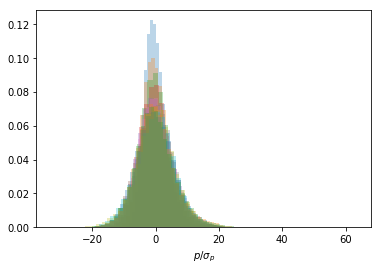

In [34]:
# Get the centerline for the last step
step = max(steps)
for i,step in enumerate(steps[1:]):
    ic,yc = get_centerline(directory,y,step)
    print(yc,ic)

    reader.step = step        
    itop = ic+10
    ibot = ic-10
    q,qbar,qprime = get_q(reader,'p')
    p = qprime[:,ibot:itop,:]
    # variance
    var = np.var(p.flatten())
    p /= var
    #h,bin_edges = np.histogram(p.flatten(), bins=50,density=True)
    plt.hist(p.flatten(), bins=50,density=True,alpha=0.3)
    #H[:,i] = h
    #B[:,i] = bin_edges[:-1]
    
plt.xlabel(r"$p/\sigma_p$")
# QT_plot = np.linspace(bin_edges[0],bin_edges[-1],1000)
# get distribution, sample and normalize
# kde = stats.gaussian_kde(h)
# pdf = kde.evaluate(QT_plot)

# plt.plot(bin_edges[:-1],h)
# plt.plot(QT_plot,pdf,'k')

In [3]:
s = '1'

if s=='1': Mc_list = ['02','04','08','12','16','20']
else: Mc_list = ['02','08','20']

for Mc in Mc_list:
    directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc%s/rr%s/1024x1448x512/'%(Mc,s)
    reader = por.PadeopsReader(directory+'/shearlayer_', periodic_dimensions=(True,False,True))
    steps = reader.steps
    inp = nml.inputs(directory,verbose=False)
    Nx,Ny,Nz,Lx,Ly,Lz = nml.read_grid_params(directory,verbose=False)
    Ny = int(Ny)
    y = np.linspace(-Ly/2.,Ly/2.,Ny)
    x = np.linspace(0,Lx,int(Nx))
    z = np.linspace(0,Lz,int(Nz))

    step = max(reader.steps)
    reader.step = step
    ic,yc = get_centerline(directory,y,step)
    plot_autocorr(reader,('u','v','w','p'),ic,savename=directory+'/img/autocorr.png')
    
print('Done')

Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/1024x1448x512//img/autocorr.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc04/rr1/1024x1448x512//img/autocorr.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/1024x1448x512//img/autocorr.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/1024x1448x512//img/autocorr.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc16/rr1/1024x1448x512//img/autocorr.png
Saved plot to  /projects/ShockInducedMix/ShearLayerData/production/Mc20/rr1/1024x1448x512//img/autocorr.png
Done
